In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc

from lasy.laser import Laser
from lasy.profiles.gaussian_profile import GaussianProfile

In [2]:
# Case with Gaussian laser

wavelength = 0.8e-6
pol = (1, 0)
laser_energy = 1. # J
t_peak = 0.0e-15  # s
tau = 30.e-15     # s
w0 = 5.e-6        # m

profile = GaussianProfile(wavelength, pol, laser_energy, w0, tau, t_peak)

dim = 'rt'
lo = (0e-6, -150e-15)
hi = (100e-6, 150e-15)
npoints = (128, 64)

laser = Laser(dim, lo, hi, npoints, profile)

<IPython.core.display.Javascript object>


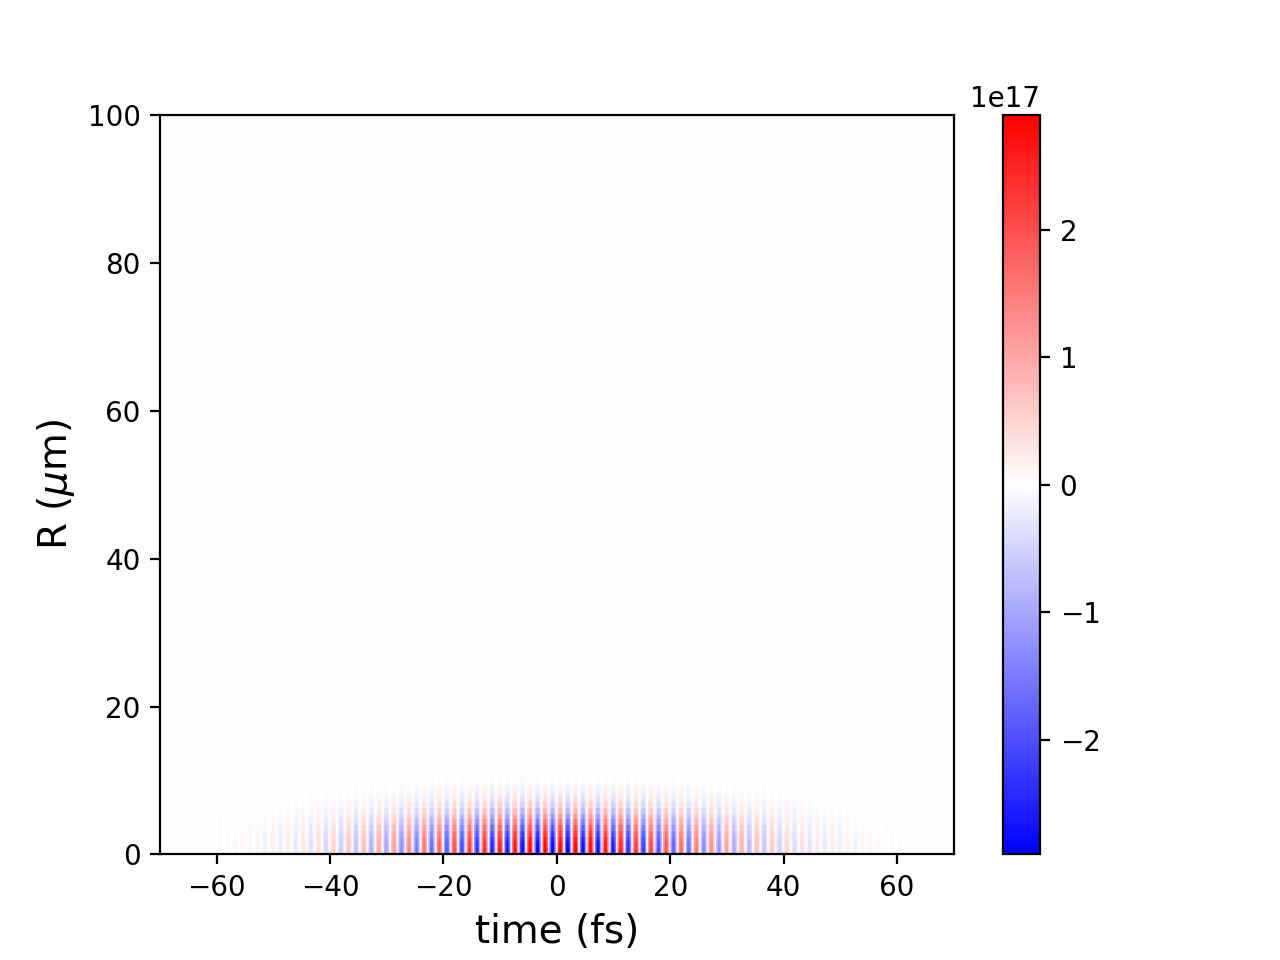

Available backends are: NP, CL, CU
CU is chosen


<IPython.core.display.Javascript object>


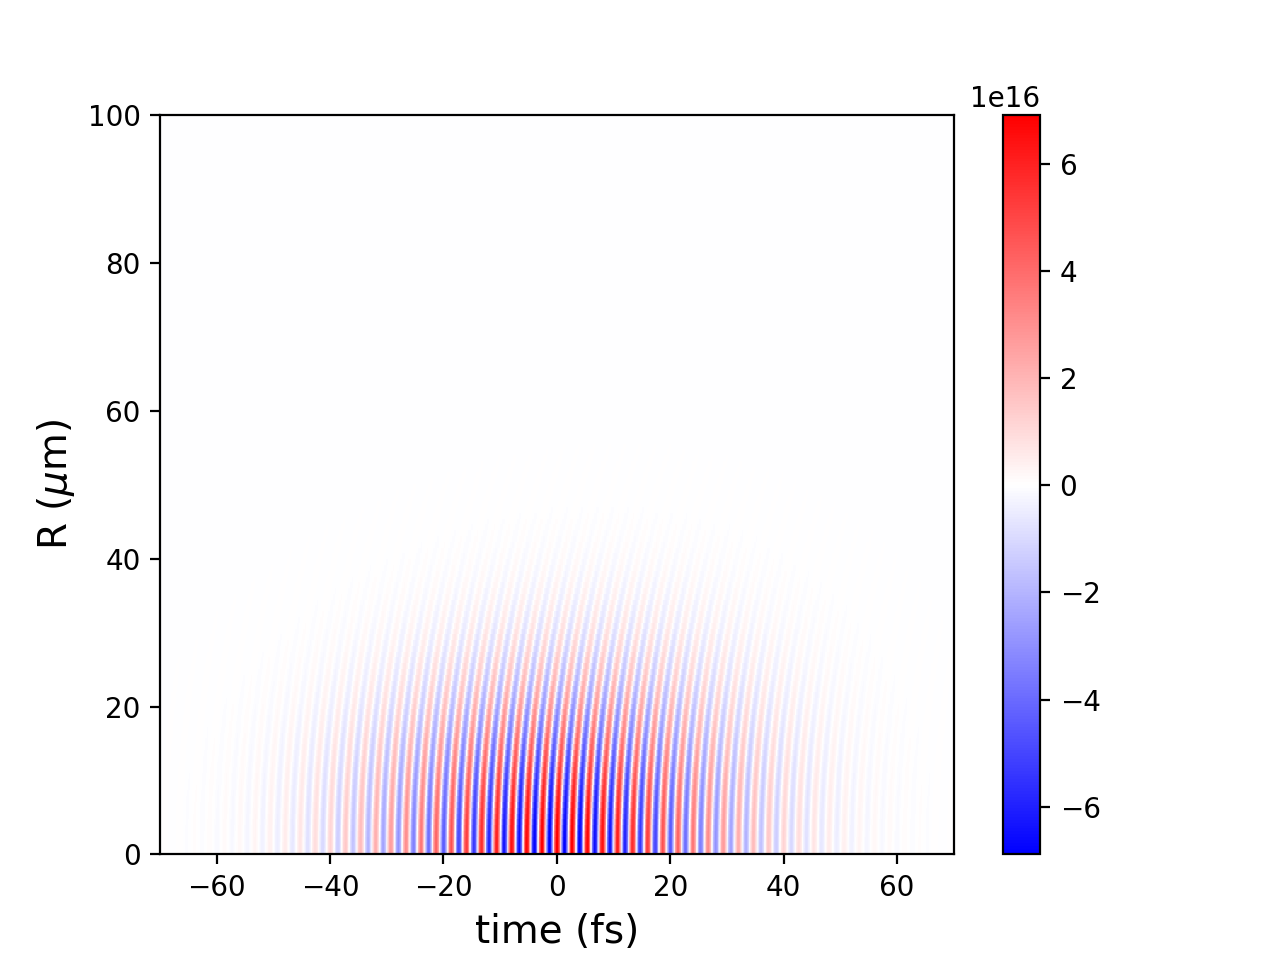

<IPython.core.display.Javascript object>


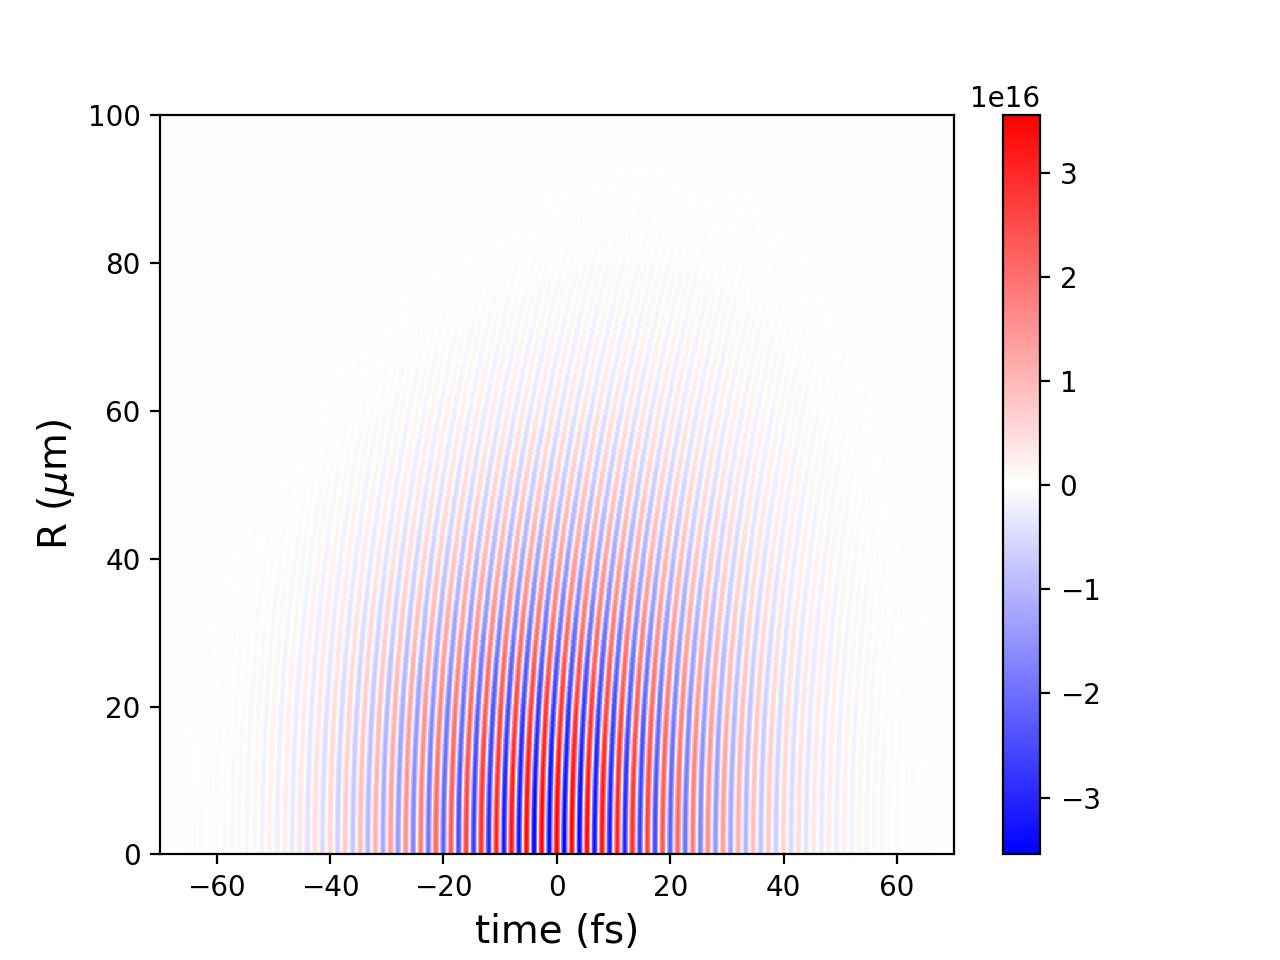

In [3]:
propagate_step = 400e-6

for step in range(3):
    A_loc, my_extent = laser.get_full_field(T_range=[-70e-15, 70e-15])
    my_extent[:2] *= 1e15
    my_extent[2:] *= 1e6

    plt.figure()
    plt.imshow( np.real(A_loc).T, 
                origin='lower',
                aspect='auto', 
                interpolation='none',
                extent=my_extent, 
                cmap=plt.cm.bwr )

    plt.colorbar()
    plt.xlabel(r'time (fs)', fontsize=14)
    plt.ylabel(r'R ($\mu$m)', fontsize=14);

    laser.propagate(propagate_step);

In [4]:
# Case with Gaussian laser

wavelength = 0.8e-6
pol = (1, 0)
laser_energy = 1. # J
t_peak = 0.0e-15 # s
tau = 30.e-15 # s
w0 = 5.e-6 # m
profile = GaussianProfile(wavelength, pol, laser_energy, w0, tau, t_peak)

# - 3D Cartesian case
dim = 'xyt'
lo = (-100e-6, -100e-6, -150e-15)
hi = (+100e-6, +100e-6, +150e-15)
npoints = (128*2, 128*2, 64)

laser = Laser(dim, lo, hi, npoints, profile)

<IPython.core.display.Javascript object>


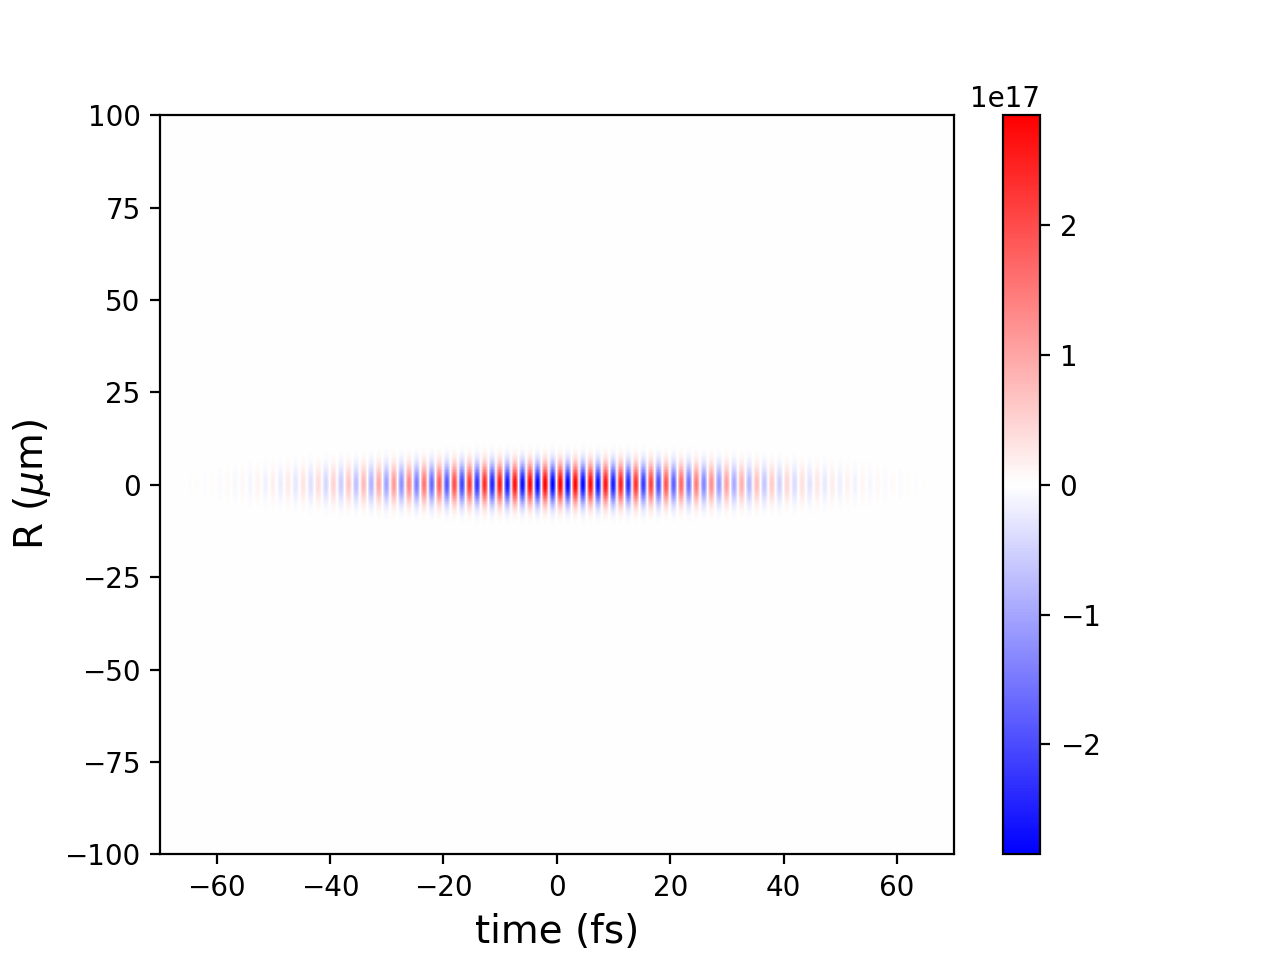

Available backends are: NP, CL, CU
CU is chosen


<IPython.core.display.Javascript object>


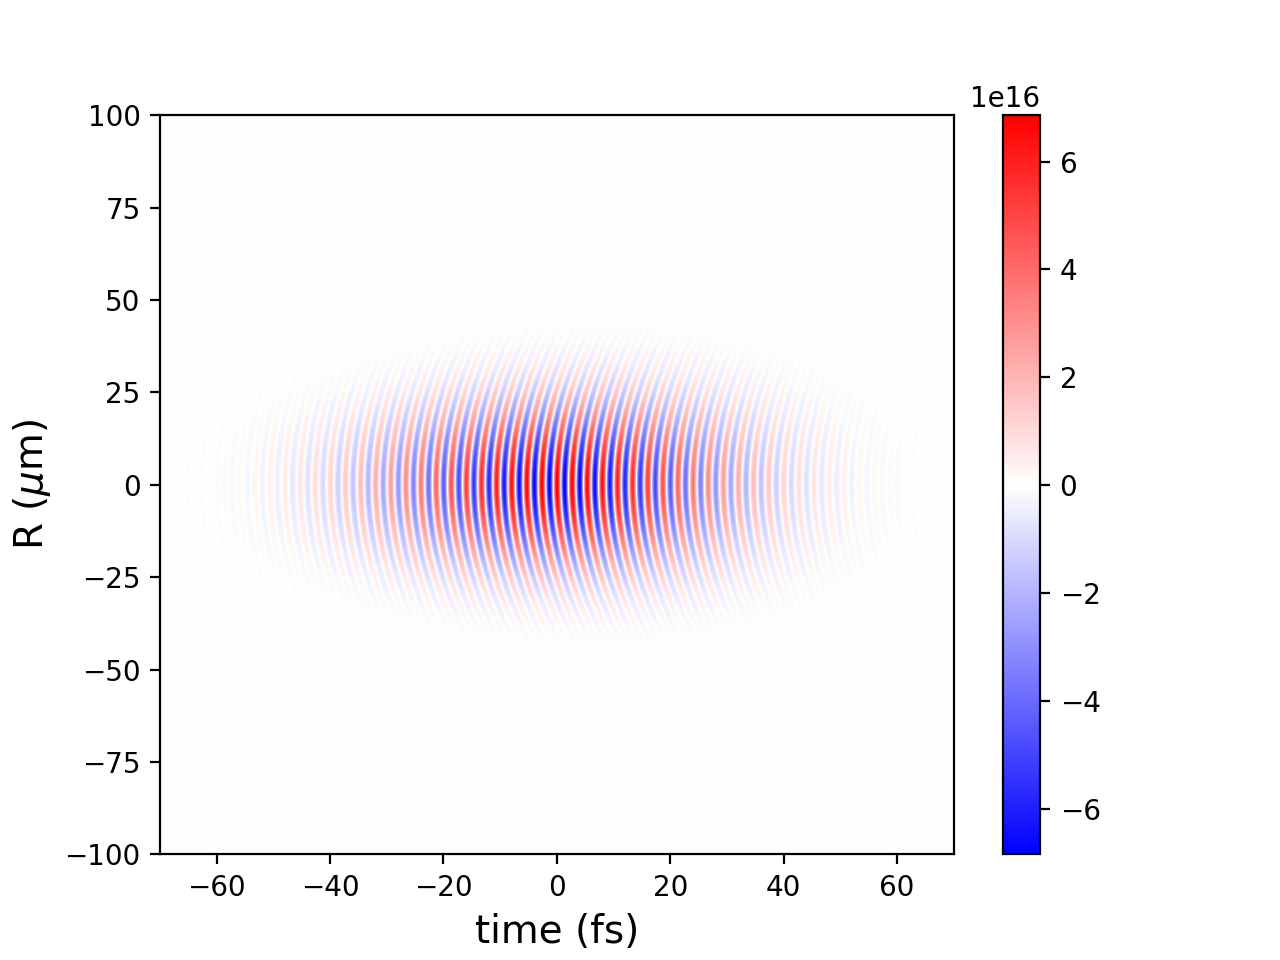

<IPython.core.display.Javascript object>


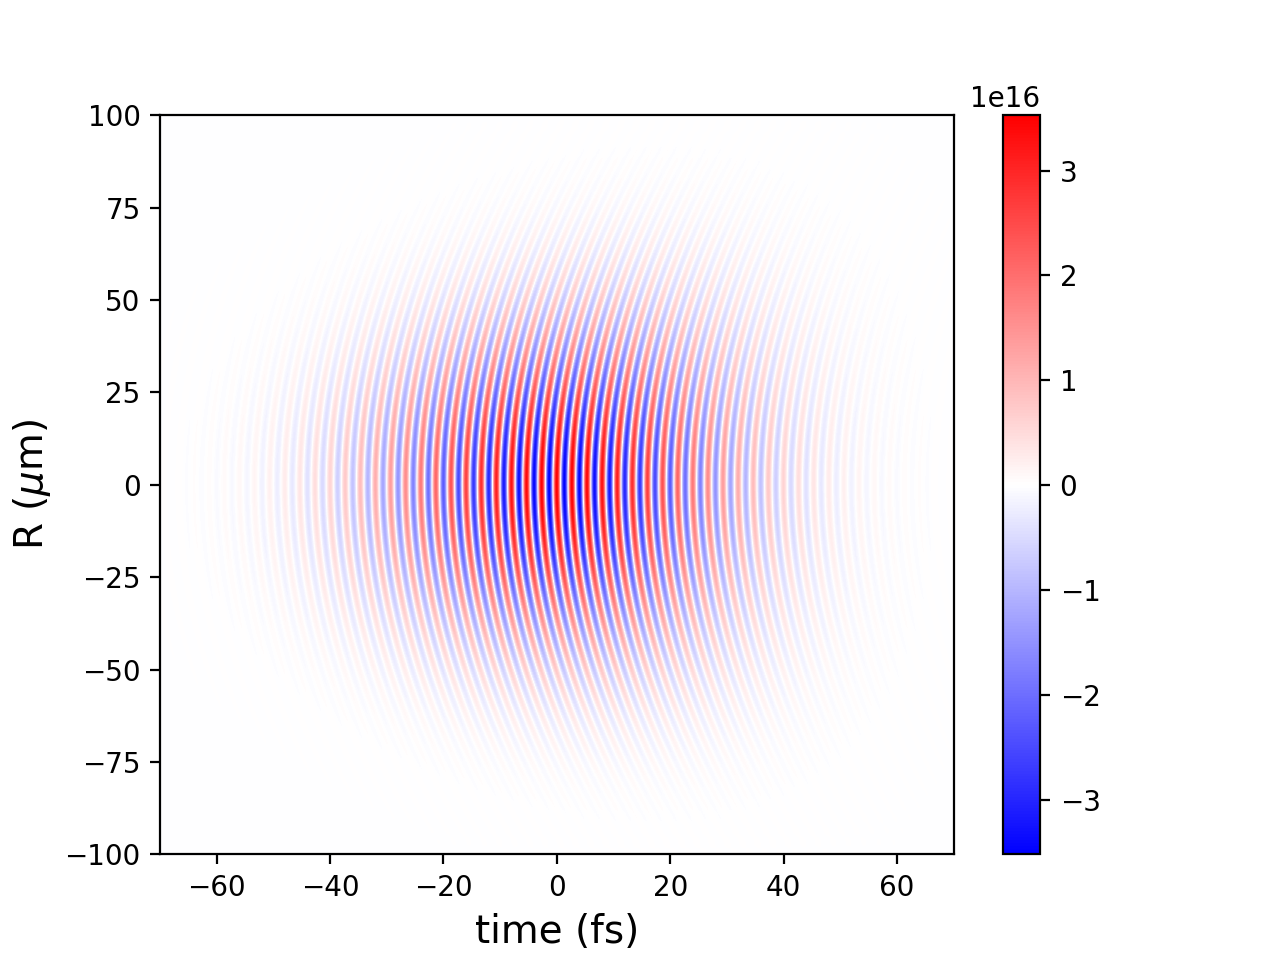

In [5]:
propagate_step = 400e-6

for step in range(3):
    A_loc, my_extent = laser.get_full_field(T_range=[-70e-15, 70e-15])
    my_extent[:2] *= 1e15
    my_extent[2:] *= 1e6

    plt.figure()
    plt.imshow( np.real(A_loc).T, 
                origin='lower',
                aspect='auto', 
                extent=my_extent, 
                cmap=plt.cm.bwr )

    plt.colorbar()
    plt.xlabel(r'time (fs)', fontsize=14)
    plt.ylabel(r'R ($\mu$m)', fontsize=14);

    laser.propagate(propagate_step);

Available backends are: NP, CL, CU
CU is chosen


<IPython.core.display.Javascript object>


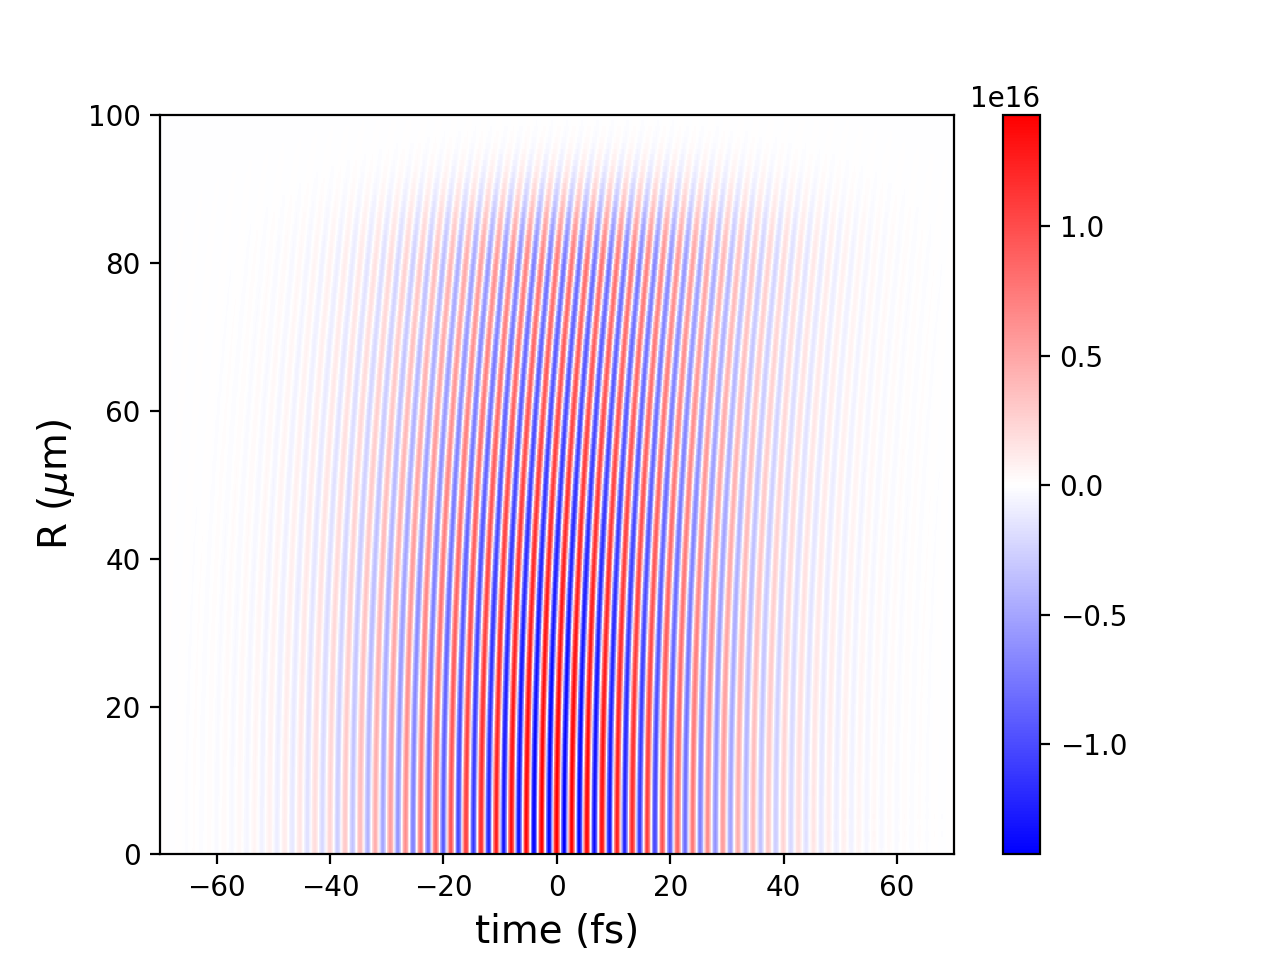

In [6]:
propagate_distance = 2e-3
propagate_step =  25e-6

Nstep = int(np.round(propagate_distance/propagate_step))
dim = 'rt'
lo = (0e-6, -150e-15)
hi = (100e-6, 150e-15)
npoints = (128, 64)
laser = Laser(dim, lo, hi, npoints, profile)

for step in range(Nstep):
    laser.propagate(propagate_step, nr_boundary=32);

A_loc, my_extent = laser.get_full_field(T_range=[-70e-15, 70e-15])
my_extent[:2] *= 1e15
my_extent[2:] *= 1e6
plt.figure()
plt.imshow( np.real(A_loc).T, 
            origin='lower',
            aspect='auto', 
            interpolation='none',
            extent=my_extent, 
            cmap=plt.cm.bwr )

plt.colorbar()
plt.xlabel(r'time (fs)', fontsize=14)
plt.ylabel(r'R ($\mu$m)', fontsize=14);